# image processing with open cv


## change color space

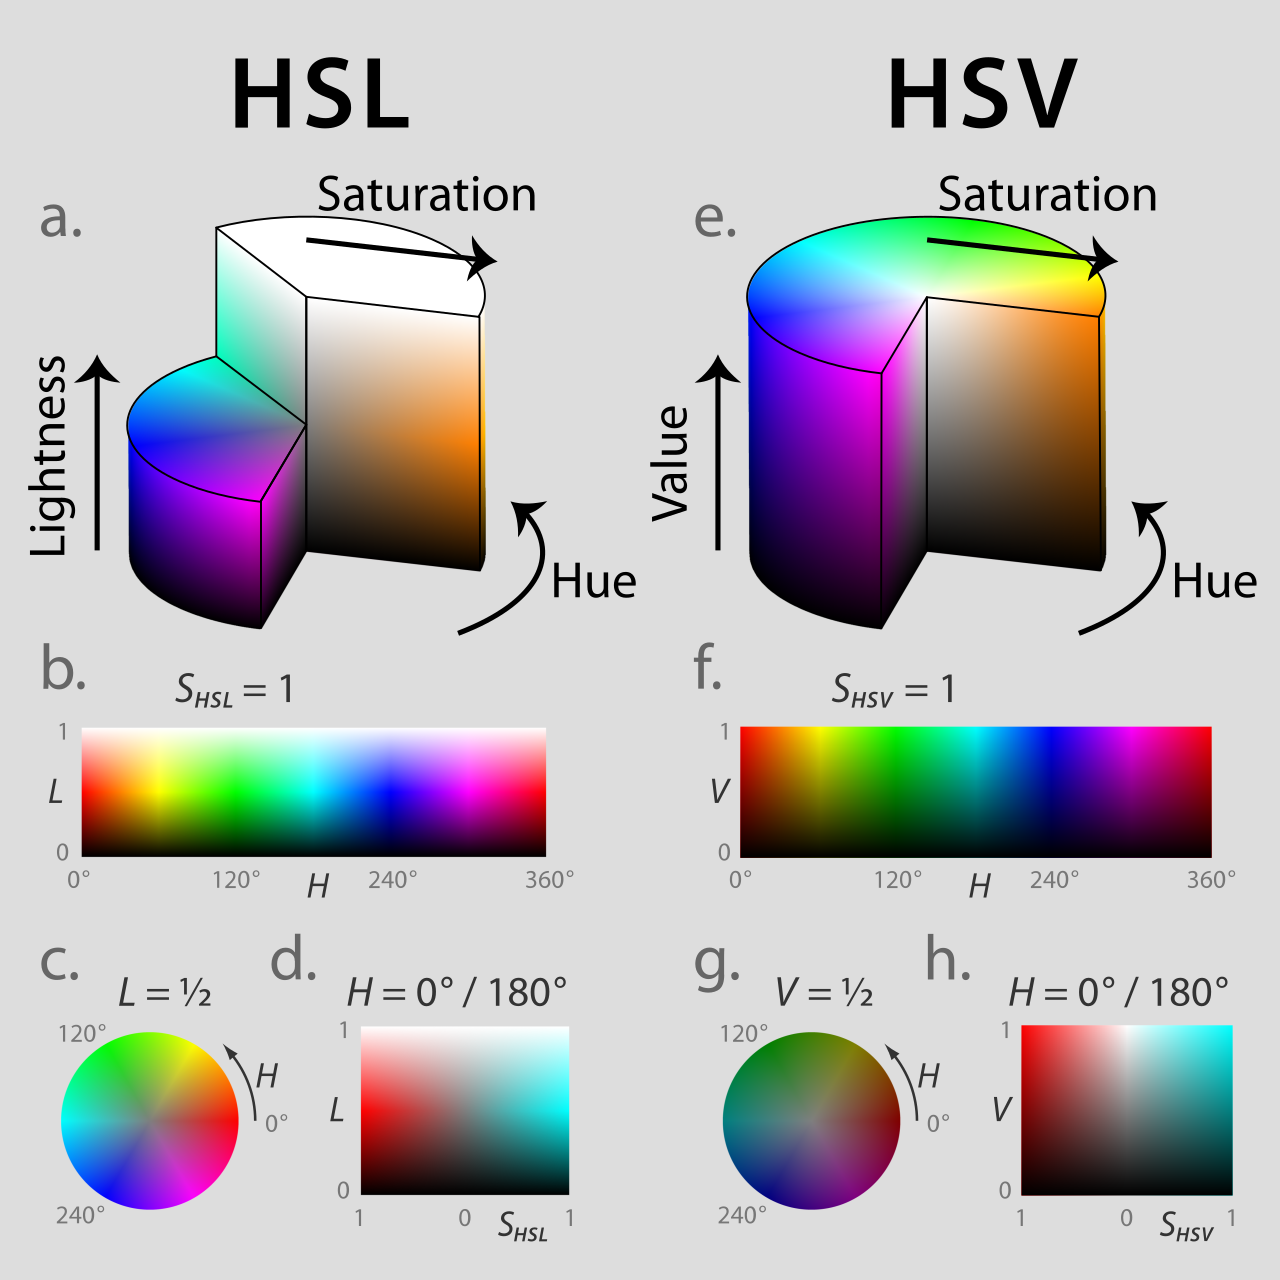


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def show_image(current_image):
    try:
        if current_image is None:
            raise ValueError("Image is None")
        
        if not isinstance(current_image, np.ndarray):
            raise TypeError("Input is not a valid image")
        
        plt.imshow(cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB))
        plt.show()
        
    except ValueError as ve:
        print(f"ValueError: {ve}")
    except TypeError as te:
        print(f"TypeError: {te}")

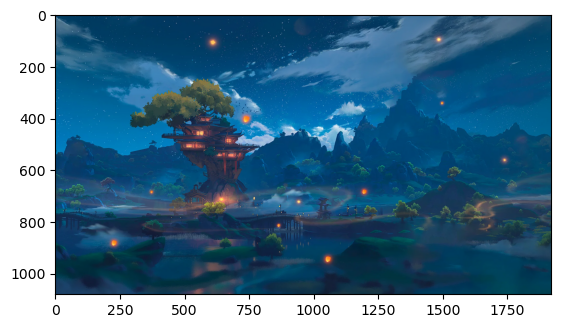

In [4]:
image = cv2.imread("images/image.png")
show_image(image)

[[[103 205 112]
  [103 205 112]
  [103 205 112]
  ...
  [102 183 107]
  [102 182 108]
  [102 182 108]]

 [[103 201 114]
  [103 201 114]
  [103 201 114]
  ...
  [102 183 107]
  [102 182 108]
  [102 182 108]]

 [[103 193 119]
  [103 193 119]
  [103 193 119]
  ...
  [102 183 107]
  [102 182 108]
  [102 182 108]]

 ...

 [[105 187 101]
  [105 187 101]
  [105 187 101]
  ...
  [ 97 255  80]
  [ 97 255  80]
  [ 97 255  80]]

 [[105 187 101]
  [105 187 101]
  [105 187 101]
  ...
  [ 97 255  80]
  [ 97 255  80]
  [ 97 255  80]]

 [[105 187 101]
  [105 187 101]
  [105 187 101]
  ...
  [ 97 255  80]
  [ 97 255  80]
  [ 97 255  80]]]


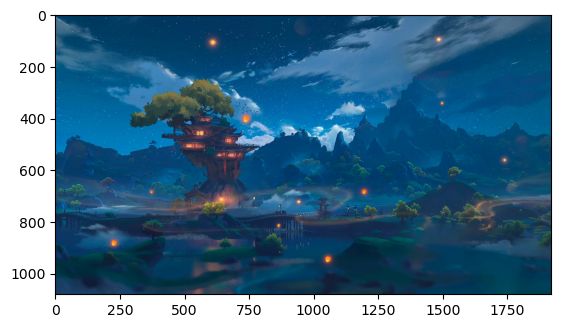

In [5]:
# change color space ( hsv color space)
image = cv2.imread('images/image.png')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print(hsv_image)

show_image(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR))

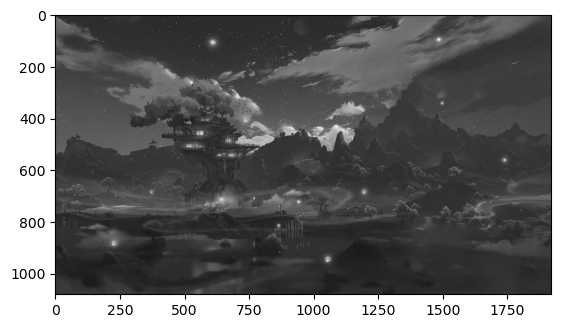

In [6]:
#change to gray color space
image = cv2.imread('images/image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(image)

In [7]:
image = cv2.imread('images/image.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
print(image)

[[[103  67 171]
  [103  67 171]
  [103  67 171]
  ...
  [102  68 143]
  [102  70 141]
  [102  70 141]]

 [[103  69 166]
  [103  69 166]
  [103  69 166]
  ...
  [102  68 143]
  [102  70 141]
  [102  70 141]]

 [[103  74 155]
  [103  74 155]
  [103  74 155]
  ...
  [102  68 143]
  [102  70 141]
  [102  70 141]]

 ...

 [[105  64 147]
  [105  64 147]
  [105  64 147]
  ...
  [ 97  40 255]
  [ 97  40 255]
  [ 97  40 255]]

 [[105  64 147]
  [105  64 147]
  [105  64 147]
  ...
  [ 97  40 255]
  [ 97  40 255]
  [ 97  40 255]]

 [[105  64 147]
  [105  64 147]
  [105  64 147]
  ...
  [ 97  40 255]
  [ 97  40 255]
  [ 97  40 255]]]


## image threshholding


In [8]:
# example of thresh holding gray image
image = cv2.imread('images/image.png') 
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

kernel  =numpy.array([[1,0,-1]]*3)
vertical_edge = cv2.filter2D(image,-1,kernel)
show_image(vertical_edge)

ret, thresh = cv2.threshold(vertical_edge,50,255,cv2.THRESH_BINARY)
show_image(thresh)

NameError: name 'numpy' is not defined

## smoothing image


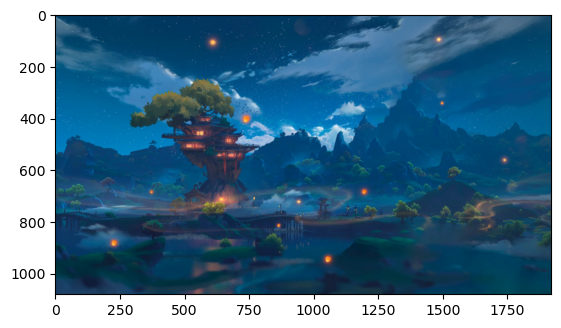

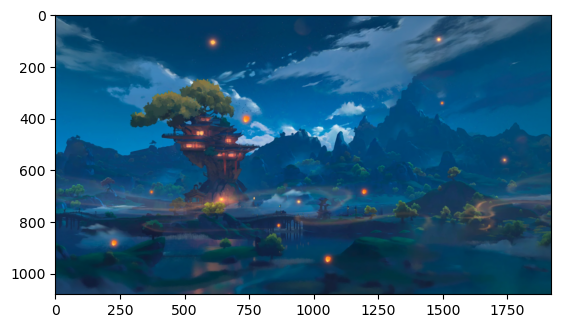

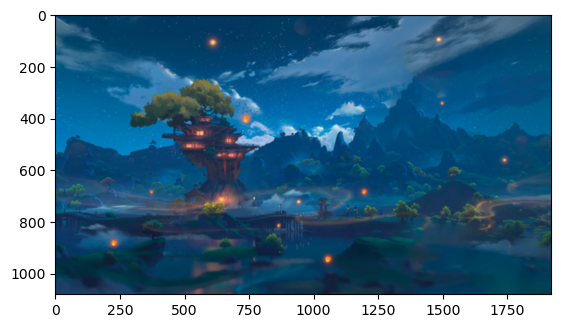

In [ ]:
# smoothing image is actually blurring image, because, blurring image bring adjacent pixel closer
image = cv2.imread("images/image.png")

gauss_blured = cv2.GaussianBlur(image,(5,5),0)
show_image(gauss_blured)

median_blured = cv2.medianBlur(image,5)
show_image(median_blured)

average_blured = cv2.blur(image,(5,5))
show_image(average_blured)

## image gradient

> gradient filter is also called high-pass filter

### there are 3 type of high-pass filter for image gradient calculation

- ## sobel
  - ### joint Gaussian blur , then differentiation operation.
  - ### more resistant to noise
- ## scharr
  - ### quite same as sobel operator
  - ### provide more accurate estimation of the gradient, bat increase O
- ## laplacian
  - ### calculate second order derivate of image (đạo hàm bậc 2)


[[ 0.          0.          0.         ...  2.10128796  2.10128796
   0.        ]
 [23.82529869 23.82529869 23.82529869 ...  2.10128796  2.10128796
   0.        ]
 [17.01807049 17.01807049 17.01807049 ... -2.67855166 -4.38035871
  -6.8072282 ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


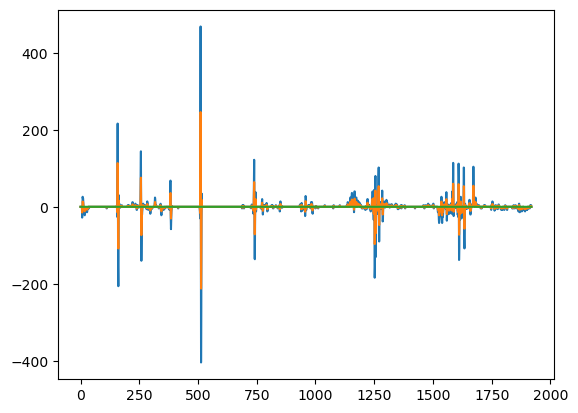

In [ ]:
#sobel operator
iamge =cv2.imread("images/image.png", cv2.IMREAD_GRAYSCALE)

angle = 45

grad_x = cv2.Sobel(iamge, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(iamge, cv2.CV_64F, 0, 1, ksize=3)

# show_image(image)
# print(grad_x)

grad = grad_x* np.cos(angle) + grad_y * np.sin(angle)
print(grad)

plt.plot(grad_x[0])
plt.plot(grad[0])
plt.plot(grad_y[0])
plt.show()



[[  0.           0.           0.         ...   8.40515182   8.40515182
    0.        ]
 [ 95.30119475  95.30119475  95.30119475 ...   8.40515182   8.40515182
    0.        ]
 [ 68.07228196  68.07228196  68.07228196 ...  -9.33798111 -17.84701636
  -27.22891279]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


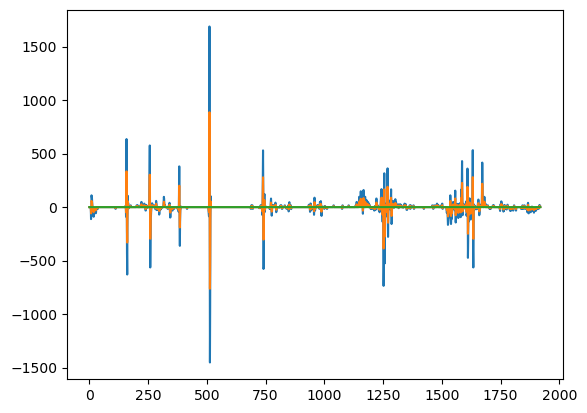

In [ ]:
# scharr operator
iamge =cv2.imread("images/image.png", cv2.IMREAD_GRAYSCALE)

angle = 45

grad_x = cv2.Scharr(iamge, cv2.CV_64F, 1, 0)
grad_y = cv2.Scharr(iamge, cv2.CV_64F, 0, 1)

# show_image(image)
# print(grad_x)

grad = grad_x* np.cos(angle) + grad_y * np.sin(angle)
print(grad)

plt.plot(grad_x[0])
plt.plot(grad[0])
plt.plot(grad_y[0])
plt.show()



[[ 6.  6.  6. ...  1. -1.  0.]
 [ 1.  1.  1. ...  1. -1.  0.]
 [-3. -3. -3. ...  0. -3. -2.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


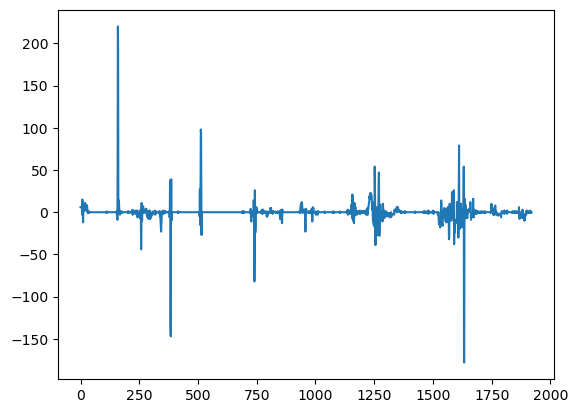

In [ ]:
image = cv2.imread("images/image.png", cv2.IMREAD_GRAYSCALE)
# show_image(image)
laplacian = cv2.Laplacian(image,cv2.CV_64F)
print(laplacian)
plt.plot(laplacian[0])
plt.show()

## Canny Edge Detection


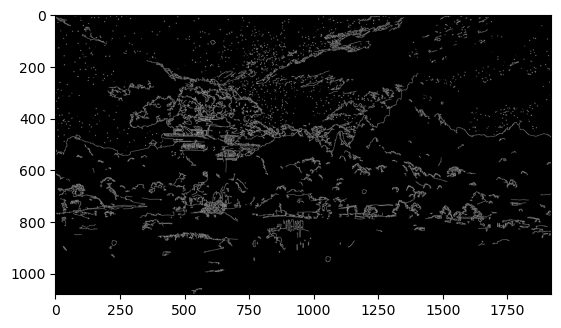

In [ ]:
img = cv2.imread("images/image.png",cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,50,150)

show_image(edges)

## contour opencv


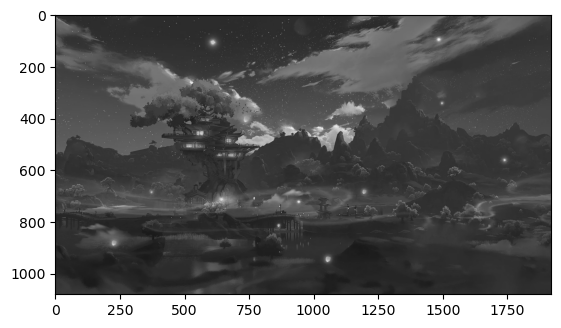

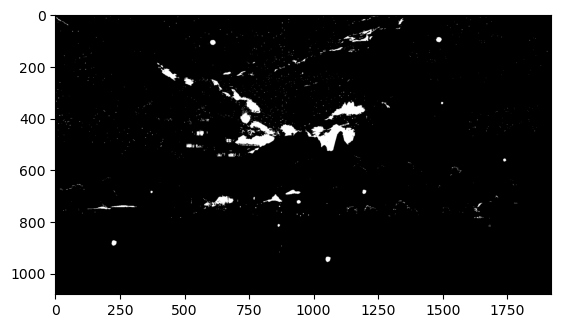

1495
34


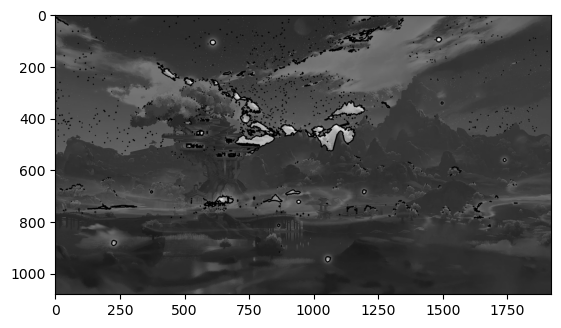

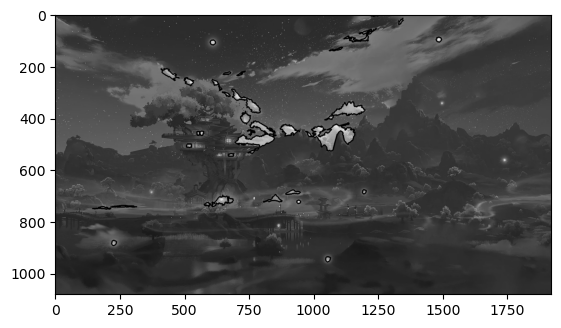

In [ ]:
import cv2

# Load an image
img = cv2.imread("images/image.png", cv2.IMREAD_GRAYSCALE)


show_image(img)
# Apply a binary threshold to the image
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
show_image(thresh)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
#find large contour
large_contour = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]
print(len(large_contour))
# Draw contours
img1 = img.copy();
img1 = cv2.drawContours(img1, contours, -1, (0,255,0), 3)
show_image(img1)
img2 = cv2.drawContours(img, large_contour, -1, (0,255,0), 3)
show_image(img2)

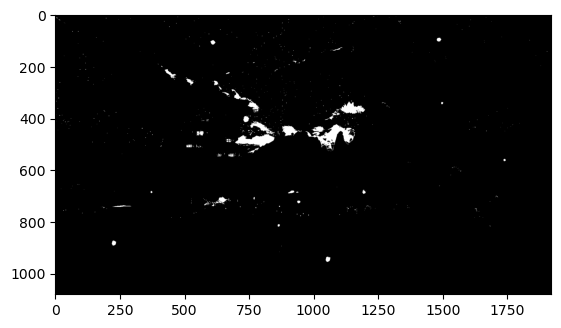

61.455843567848206
246.0
(1048, 936, 18, 20)


In [ ]:
# other function about contours
img = cv2.imread("images/image.png", cv2.IMREAD_GRAYSCALE)

_,threshold= cv2.threshold(img,150,255,cv2.THRESH_BINARY)
show_image(threshold)

contours,_ = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


#get length of contours ( perimeter)
contour = contours[0]
print(cv2.arcLength(contour,closed=True))

# get area of contours
print(cv2.contourArea(contour))

# return rectangle that bounding contour
print(cv2.boundingRect(contour))


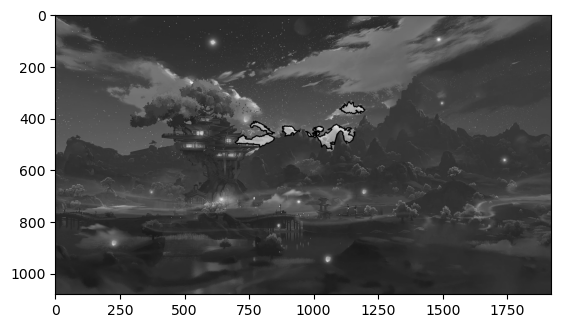

In [ ]:
#get top 5 contours and show:

image = cv2.imread("images/image.png", cv2.IMREAD_GRAYSCALE)
_,threshold = cv2.threshold(image,150,255,cv2.THRESH_BINARY)

contours,_ = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours,key= cv2.contourArea,reverse=True)[:5]

image = cv2.drawContours(image,contours,-1, (0,255,0), 3)
show_image(image)

## histogram


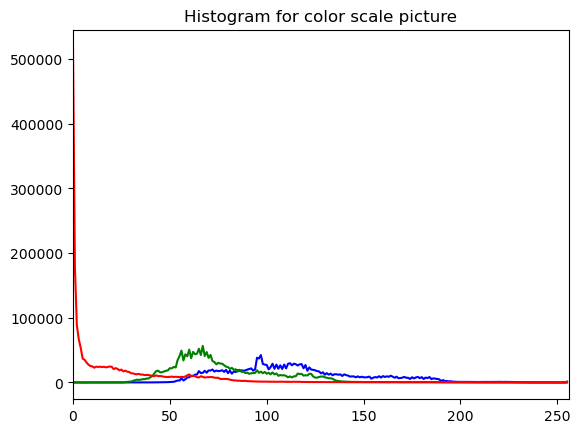

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image in grayscale
img = cv2.imread('images/image.png')

# Calculate the histogram
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])

plt.title('Histogram for color scale picture')
plt.show()

## template matching


0.9795544147491455


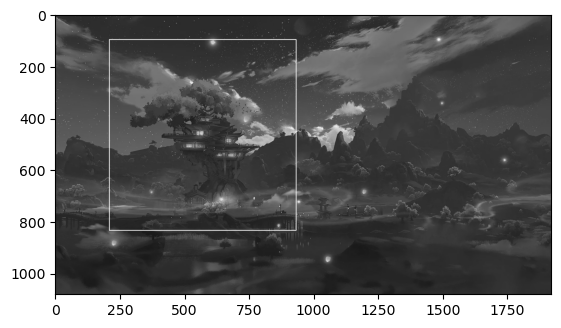

In [ ]:
# Load the source image and template
img = cv2.imread("images/image.png",0)
template =cv2.imread("images/template.png",0)


# Get the width and height of the template
w, h = template.shape[::-1]


# Apply template matching
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Use cv2.rectangle to draw a rectangle around the matched region
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img, top_left, bottom_right, 255, 2)

print(max_val)



# Show the image
show_image(img)

## hough line transform


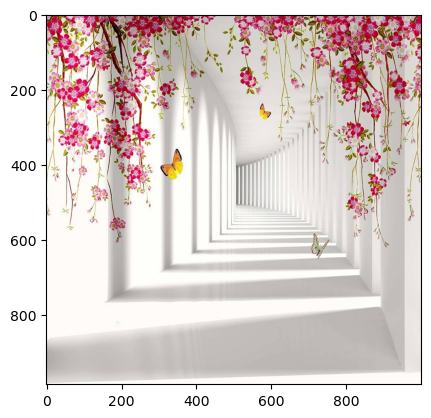

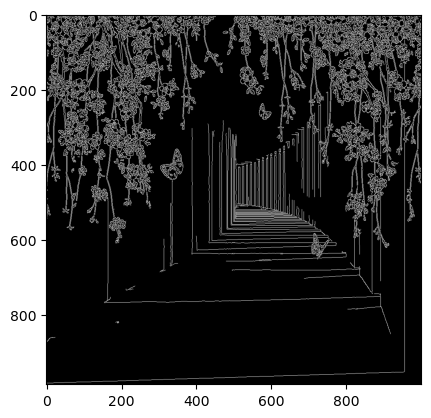

[[956.   0.]]


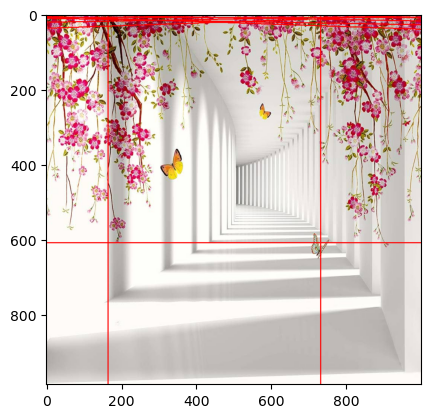

In [ ]:
img = cv2.imread('images/line.jpg')
show_image(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
show_image(edges)
print(lines[0])

for line in lines[5:15]:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
show_image(img)

## hough circle transform


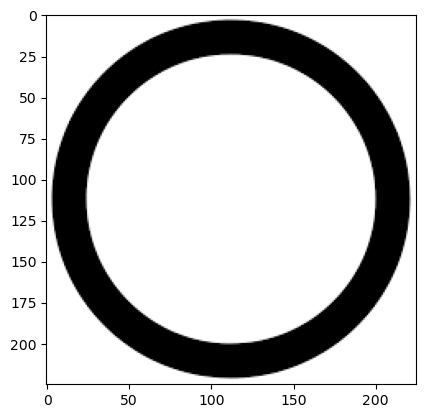

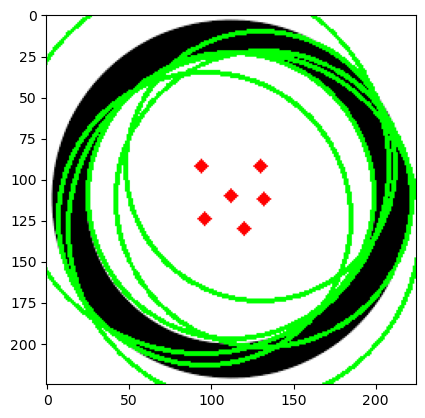

In [16]:
img = cv2.imread("images/circle.png",0)
img = cv2.medianBlur(img,5)
cimg = cv2.imread("images/circle.png")
show_image(cimg)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20, param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)


show_image(cimg)

## Image Segmentation


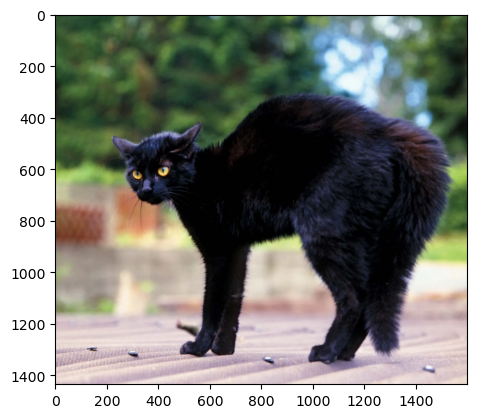

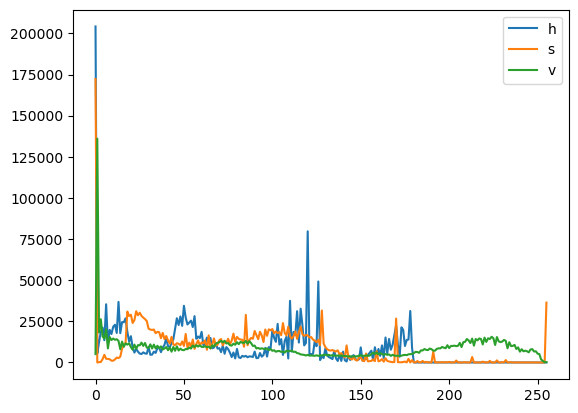

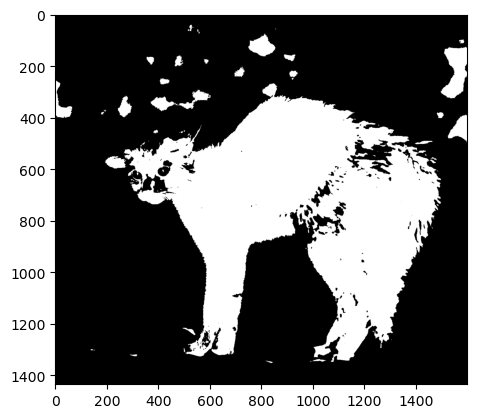

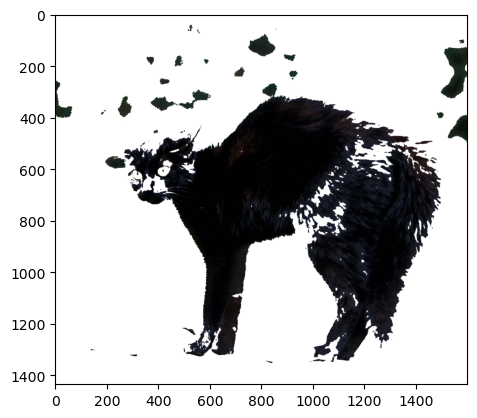

In [99]:
# segmentation using hsv color

# Load image
image = cv2.imread("images/cat.jpeg")
show_image(image)

# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

channels = ['h','s','v']
for i,c in enumerate(channels):
    hist = cv2.calcHist([hsv], [i], None, [256], [0,256])
    plt.plot(hist, label=c)
plt.legend()
plt.show()

# Define range of color in HSV
lower_val = np.array([0,0,0])
upper_val = np.array([180,255,50])

# Threshold the HSV image to get only the colors in defined range
mask = cv2.inRange(hsv, lower_val, upper_val)

show_image(mask)



# Bitwise-AND mask and original image
# res = cv2.bitwise_and(image, image, mask=mask)
res = cv2.bitwise_and(image, image, mask=mask)

# Create a white image of the same size as the original image
white_image = np.ones_like(image) * 255

# Bitwise-AND white_image and white_image with the inverse mask
masked_white_image = cv2.bitwise_and(white_image, white_image, mask=cv2.bitwise_not(mask))

# Bitwise-OR res and masked_white_image
final_image = cv2.bitwise_or(res, masked_white_image)

show_image(final_image)

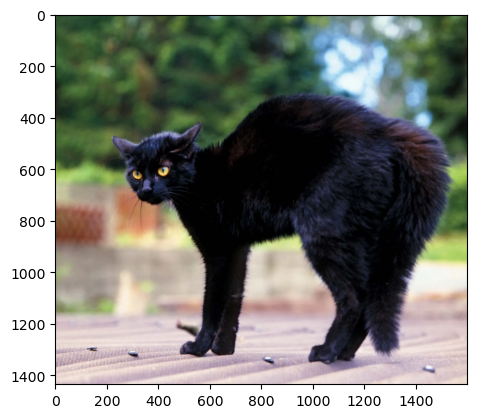

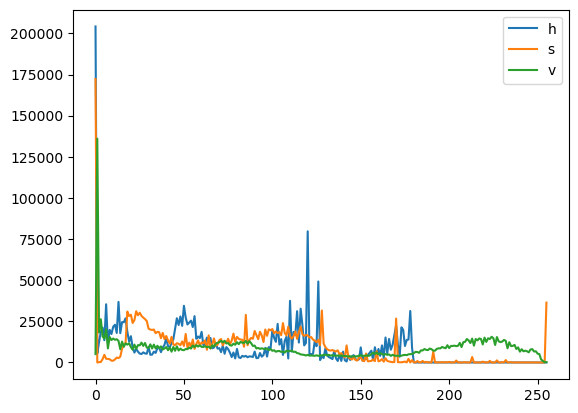

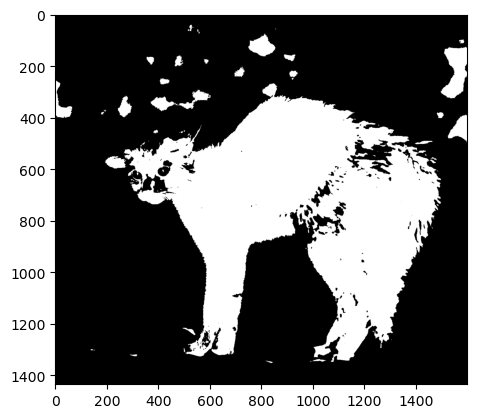

348


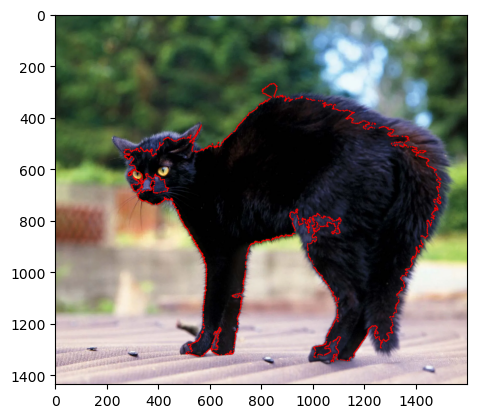

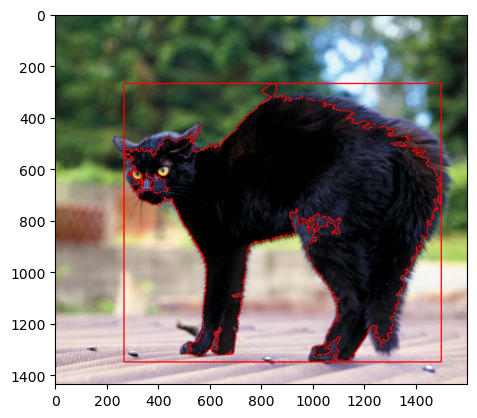

In [102]:
# segmentation with contours and hsv 
# Load image
image = cv2.imread("images/cat.jpeg")
show_image(image)

# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

channels = ['h','s','v']
for i,c in enumerate(channels):
    hist = cv2.calcHist([hsv], [i], None, [256], [0,256])
    plt.plot(hist, label=c)
plt.legend()
plt.show()

# Define range of color in HSV
lower_val = np.array([0,0,0])
upper_val = np.array([180,255,50])

# Threshold the HSV image to get only the colors in defined range
mask = cv2.inRange(hsv, lower_val, upper_val)

show_image(mask)

# try with contours
contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
contour = sorted(contours,key=cv2.contourArea,reverse=True)[0]


show_image(cv2.drawContours(image,contour, -1,(0,0,255),3))

x,y,w,h = cv2.boundingRect(contour)

show_image(cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3))

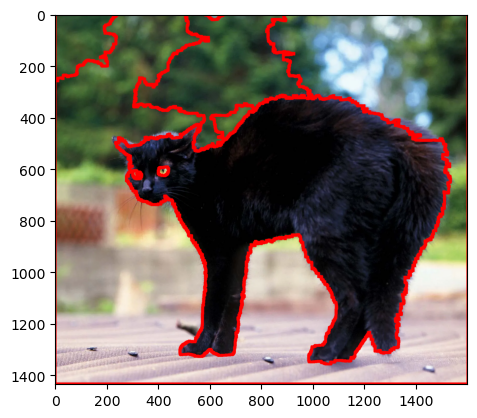

In [115]:
from scipy.ndimage import label

# Load the image
image = cv2.imread("images/cat.jpeg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# Sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
_, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

# Apply watershed
markers = cv2.watershed(image,markers)

# Define the boundary
boundary = (markers == -1)

# Convert the boundary to an 8-bit unsigned integer array
boundary = boundary.astype(np.uint8)

# Dilate the boundaries
kernel = np.ones((3,3),np.uint8)
dilated_boundary = cv2.dilate(boundary,kernel,iterations=5)

# Overlay the dilated boundaries on the original image
image[dilated_boundary == 1] = [0,0,255]

show_image(image)

## image denoising


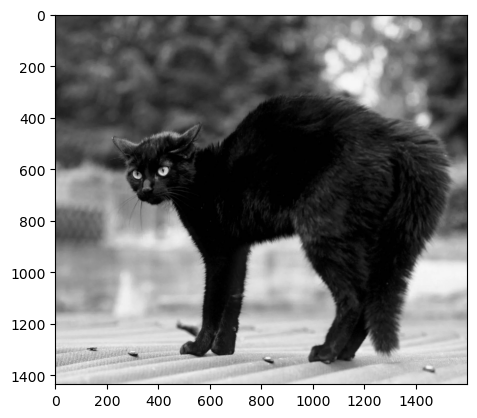

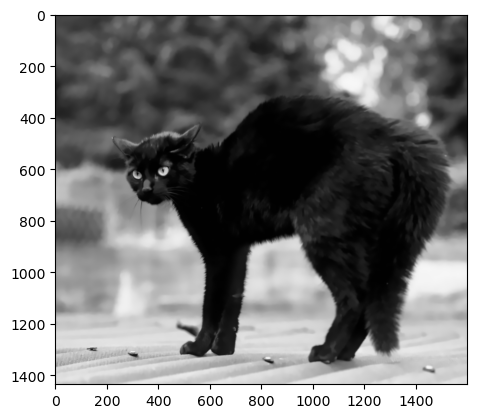

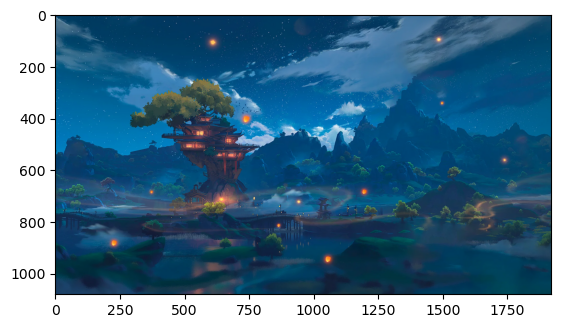

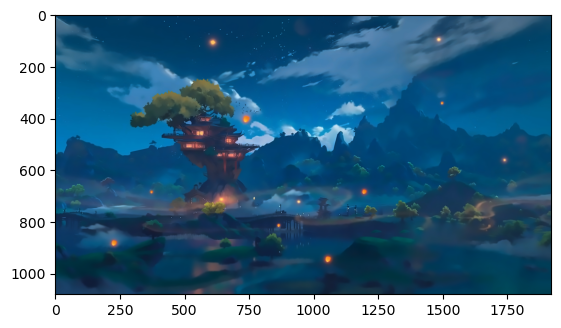

In [119]:
# fast ni means denoising
image = cv2.imread("images/cat.jpeg", cv2.IMREAD_GRAYSCALE)
show_image(image)
show_image(cv2.fastNlMeansDenoising(image,h=10,templateWindowSize=7,searchWindowSize=21))
image = cv2.imread("images/image.png")
show_image(image)
show_image(cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21))

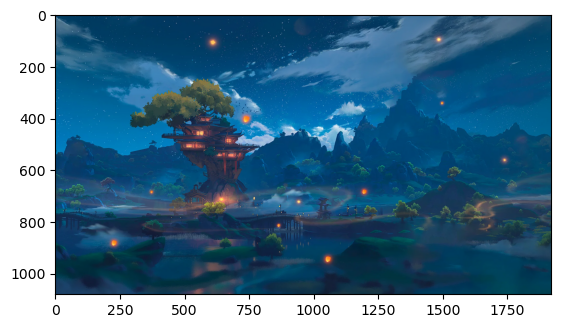

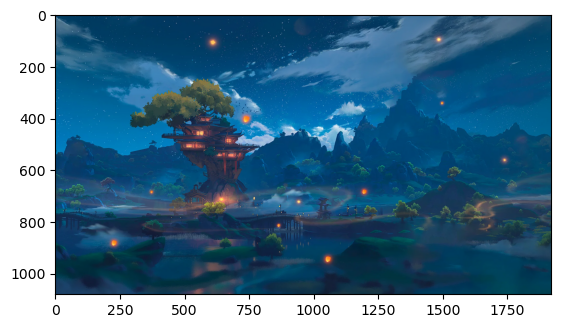

In [122]:
#bilateral filter
image = cv2.imread("images/image.png")
show_image(image)
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
show_image(image)

## image inpainting


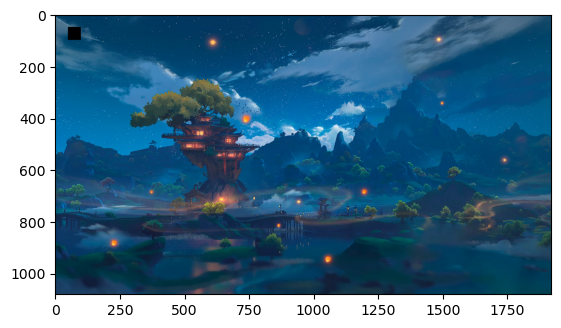

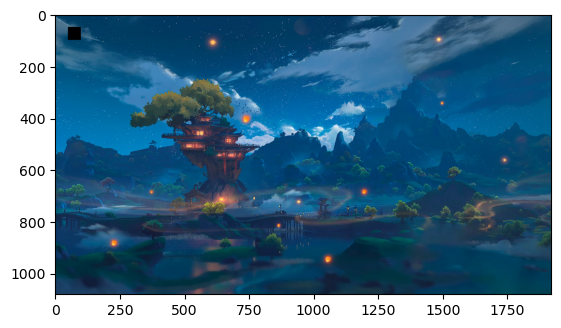

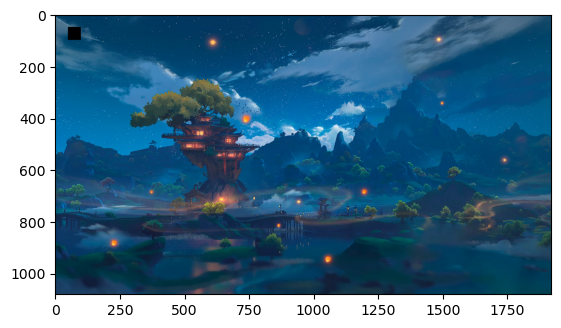

In [137]:
image = cv2.imread("images/image.png")

x_slice = slice(50, 100)
y_slice = slice(50, 100)

image[x_slice, y_slice] = 0
show_image(image)

mask = np.zeros_like(image[:,:,0])

# Set the region of the black square to white
mask = np.zeros_like(image[:,:,0])

# fast marching method
image1 = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)
show_image(image1)
# navier stock
image2 = cv2.inpaint(image, mask, 3, cv2.INPAINT_NS)
show_image(image2)
